# EDA Cleaned

欄位說明:

-   PassengerId: 乘客編號
-   Survived: 是否存活
-   Pclass: 艙等
-   Name: 姓名
-   Sex: 性別
-   Age: 年齡
-   SibSp: 同行兄弟姊妹/配偶數
-   Parch: 同行父母/子女數
-   Ticket: 票號
-   Fare: 船票價格
-   Cabin: 客艙編號
-   Embarked: 登船港口

## 載入套件與基本設定

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 載入資料

In [2]:
train_df = pd.read_csv('../data/processed/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


## 檢查特徵與生存關係

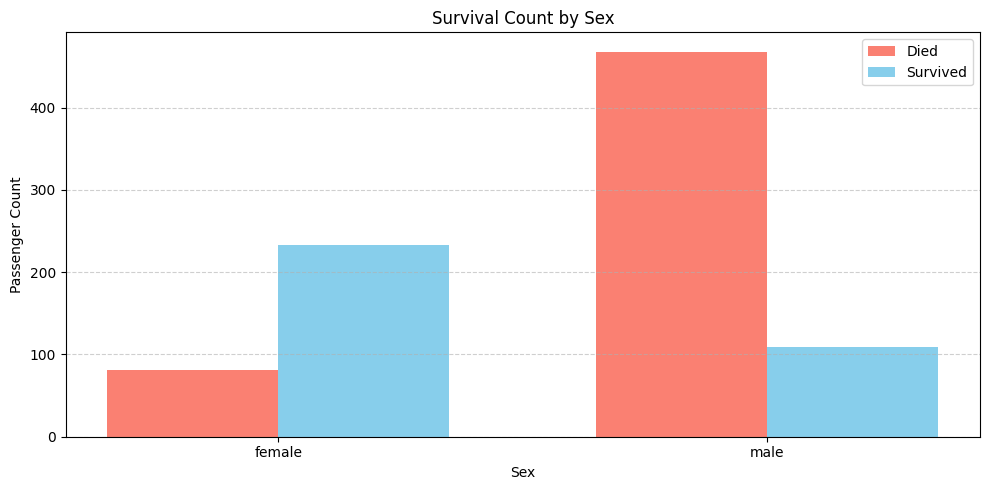

In [12]:
counts = train_df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
labels = counts.index.tolist()
x = np.arange(len(labels))

bar_width = 0.35

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.bar(x - bar_width/2, counts[0], width=bar_width, label='Died', color='salmon')
ax.bar(x + bar_width/2, counts[1], width=bar_width, label='Survived', color='skyblue')

# 加上標籤與格式
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Passenger Count')
ax.set_xlabel('Sex')
ax.set_title('Survival Count by Sex')
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()